# FRAUDULENT F|IRM CLASSIFICATION : 
Leveraging Machine Learning to Identify Fraudulent Firms Using Current and Historic Risk Factors


Data Preprocessing
Data pre-processing is a data mining technique that involves transforming raw data into
an understandable format. Real-world data is often incomplete, inconsistent, lacking in
certain behaviors or trends, and is likely to contain many errors. Data pre-processing is
a proven method of resolving such issues. Data pre-processing prepares raw data for
further processing. Data pre-processing is used in database-driven applications such as
customer relationship management and rule-based applications (like neural networks).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


import seaborn as sns
%matplotlib inline
import itertools
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC 
plt.style.use('fivethirtyeight')

In [2]:
!pip install xgboost


# Data Understanding

In [3]:
df= pd.read_csv('audit_data.csv')

In [4]:
df

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,...,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


In [5]:
df.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [7]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [8]:
df.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [9]:
df['Money_Value'].fillna((df['Money_Value'].mean()), inplace=True)


# Data Cleaning 

In [10]:
df.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

Observation: As we can see that Money_Value has one null value so I am imputing it
with the mean value of this feature

# Exploratory Data Analysis (EDA)
It is an approach to analysing datasets to summarize their main characteristics, often w
ith visual methods. EDA is used for seeing what the data can tell us before the modelli
ng task. It is not easy to look at a column of numbers or a whole spreadsheet and deter
mine important characteristics of the data. It may be tedious, boring, and/or overwhel
ming to derive insights by looking at plain numbers. Exploratory data analysis techniq
ues have been devised as an aid in this situation. Exploratory data analysis is generally
cross-classified in two ways. First, each method is either non-graphical or graphical. A
nd second, each method is either univariate or multivariate (usually just bivariate)

<AxesSubplot:xlabel='Risk', ylabel='count'>

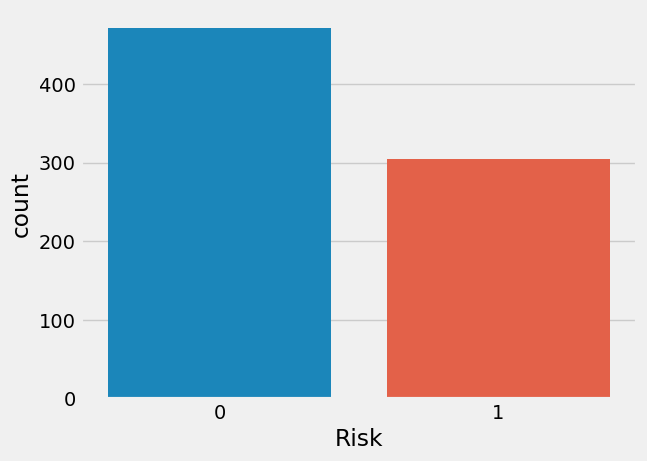

In [11]:
sns.countplot(df['Risk'], label = "Count")

In [12]:
X=df.drop(['Risk'],axis=1)

<AxesSubplot:title={'center':'Correlation with Churn'}>

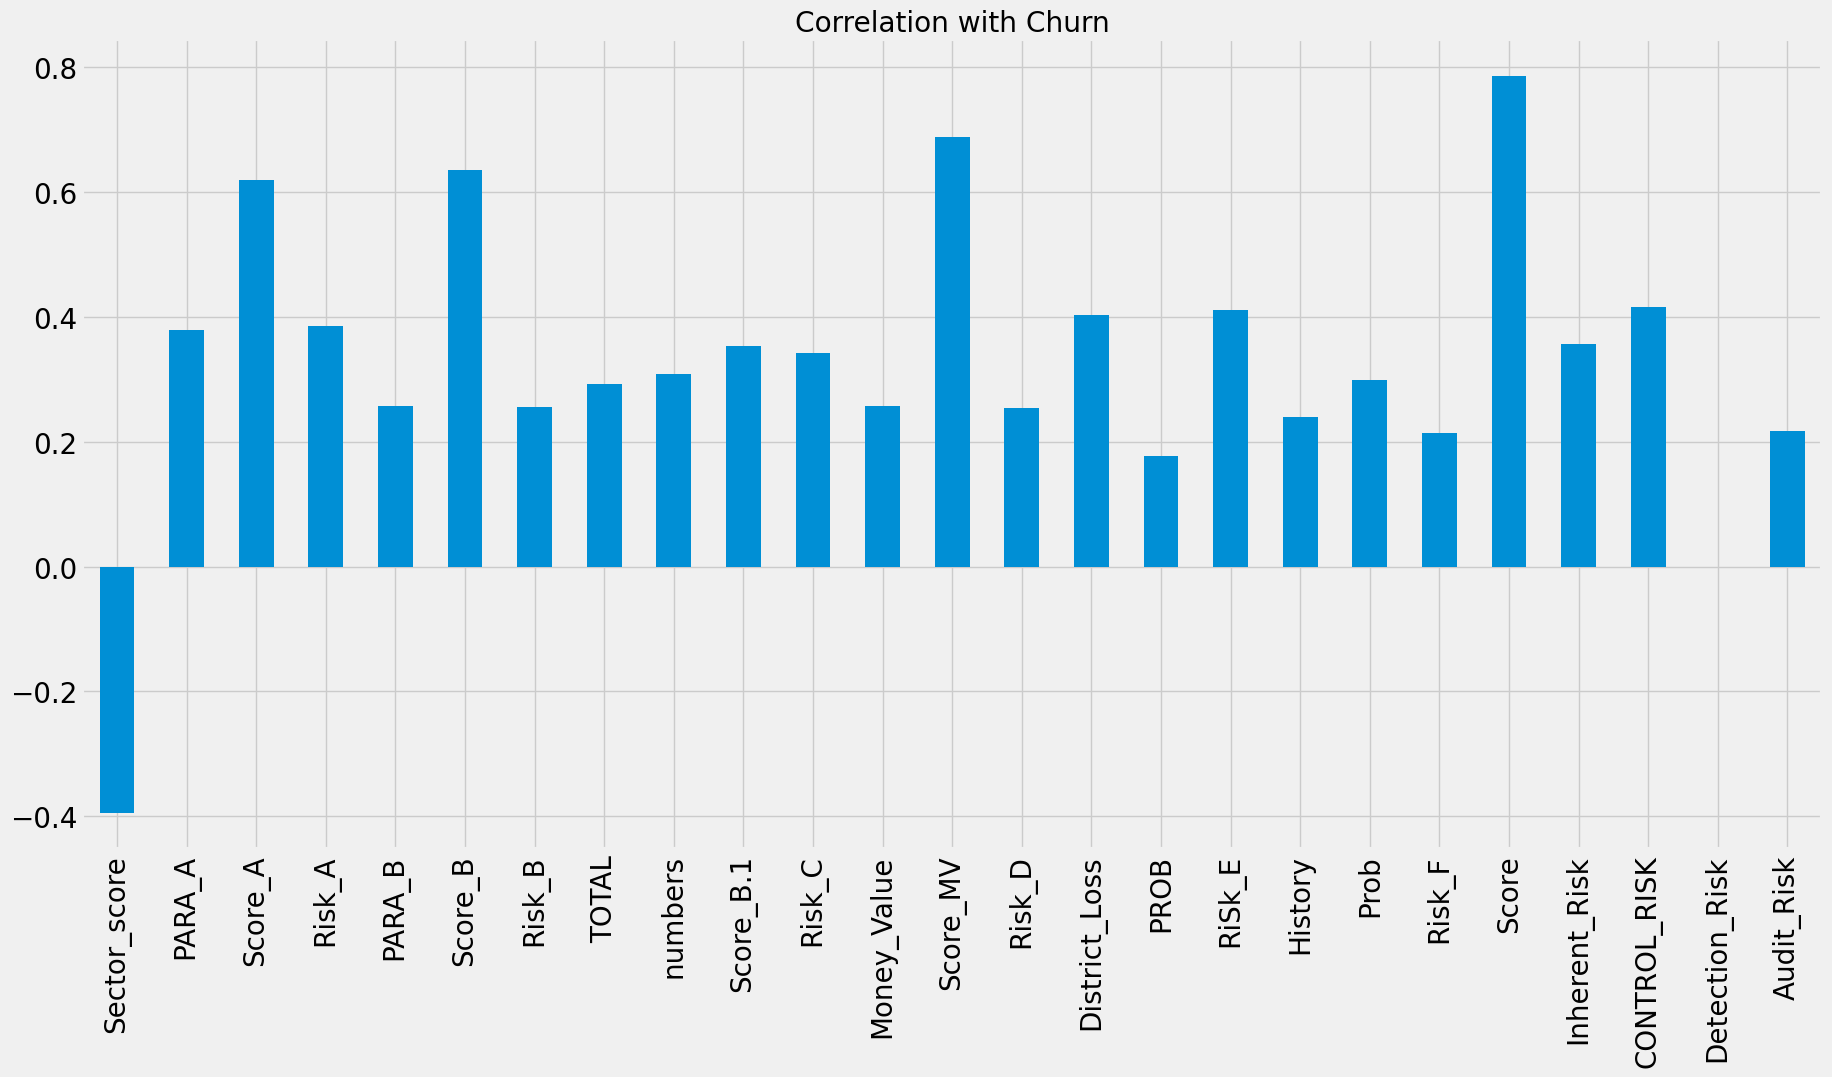

In [13]:
X.corrwith(df.Risk).plot.bar(
 figsize = (20, 10), title = "Correlation with Churn", fontsize = 20,rot = 90, grid = True)

In [14]:
X.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
Sector_score,1.0,-0.22,-0.43,-0.22,-0.13,-0.22,-0.13,-0.15,-0.15,-0.17,-0.17,-0.12,-0.32,-0.12,-0.11,-0.087,-0.13,-0.11,-0.14,-0.1,-0.34,-0.17,-0.15,nan,-0.092
PARA_A,-0.22,1.0,0.5,1.0,0.16,0.36,0.16,0.27,0.13,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.17,0.1,0.43,0.48,0.15,nan,0.22
Score_A,-0.43,0.5,1.0,0.5,0.25,0.57,0.25,0.3,0.24,0.27,0.27,0.21,0.48,0.2,0.089,0.094,0.1,0.18,0.27,0.15,0.72,0.32,0.17,nan,0.2
Risk_A,-0.22,1.0,0.5,1.0,0.17,0.36,0.17,0.27,0.14,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.18,0.11,0.43,0.48,0.15,nan,0.22
PARA_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.99,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.079,0.2,0.32,0.2,0.4,0.65,0.19,nan,0.89
Score_B,-0.22,0.36,0.57,0.36,0.35,1.0,0.35,0.38,0.28,0.31,0.3,0.21,0.57,0.2,-0.0047,0.093,0.015,0.2,0.31,0.17,0.9,0.37,0.13,nan,0.21
Risk_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.99,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.08,0.2,0.32,0.2,0.4,0.65,0.19,nan,0.89
TOTAL,-0.15,0.27,0.3,0.27,0.99,0.38,0.99,1.0,0.22,0.24,0.23,0.17,0.34,0.17,0.093,0.046,0.089,0.21,0.33,0.2,0.43,0.69,0.2,nan,0.89
numbers,-0.15,0.13,0.24,0.14,0.21,0.28,0.21,0.22,1.0,0.91,0.96,0.19,0.45,0.19,0.13,0.036,0.14,0.2,0.21,0.2,0.5,0.27,0.23,nan,0.22
Score_B.1,-0.17,0.14,0.27,0.14,0.23,0.31,0.23,0.24,0.91,1.0,0.99,0.22,0.51,0.22,0.15,0.037,0.16,0.23,0.25,0.22,0.57,0.31,0.26,nan,0.26


Observation: As we have seen there is no correlation of Detection_Risk so it will be d
eleted before model building process as it is not contributing well enough for predictio
n process.


In [15]:
X=X.drop(['Detection_Risk'],axis=1)
X.columns


Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Audit_Risk'],
      dtype='object')

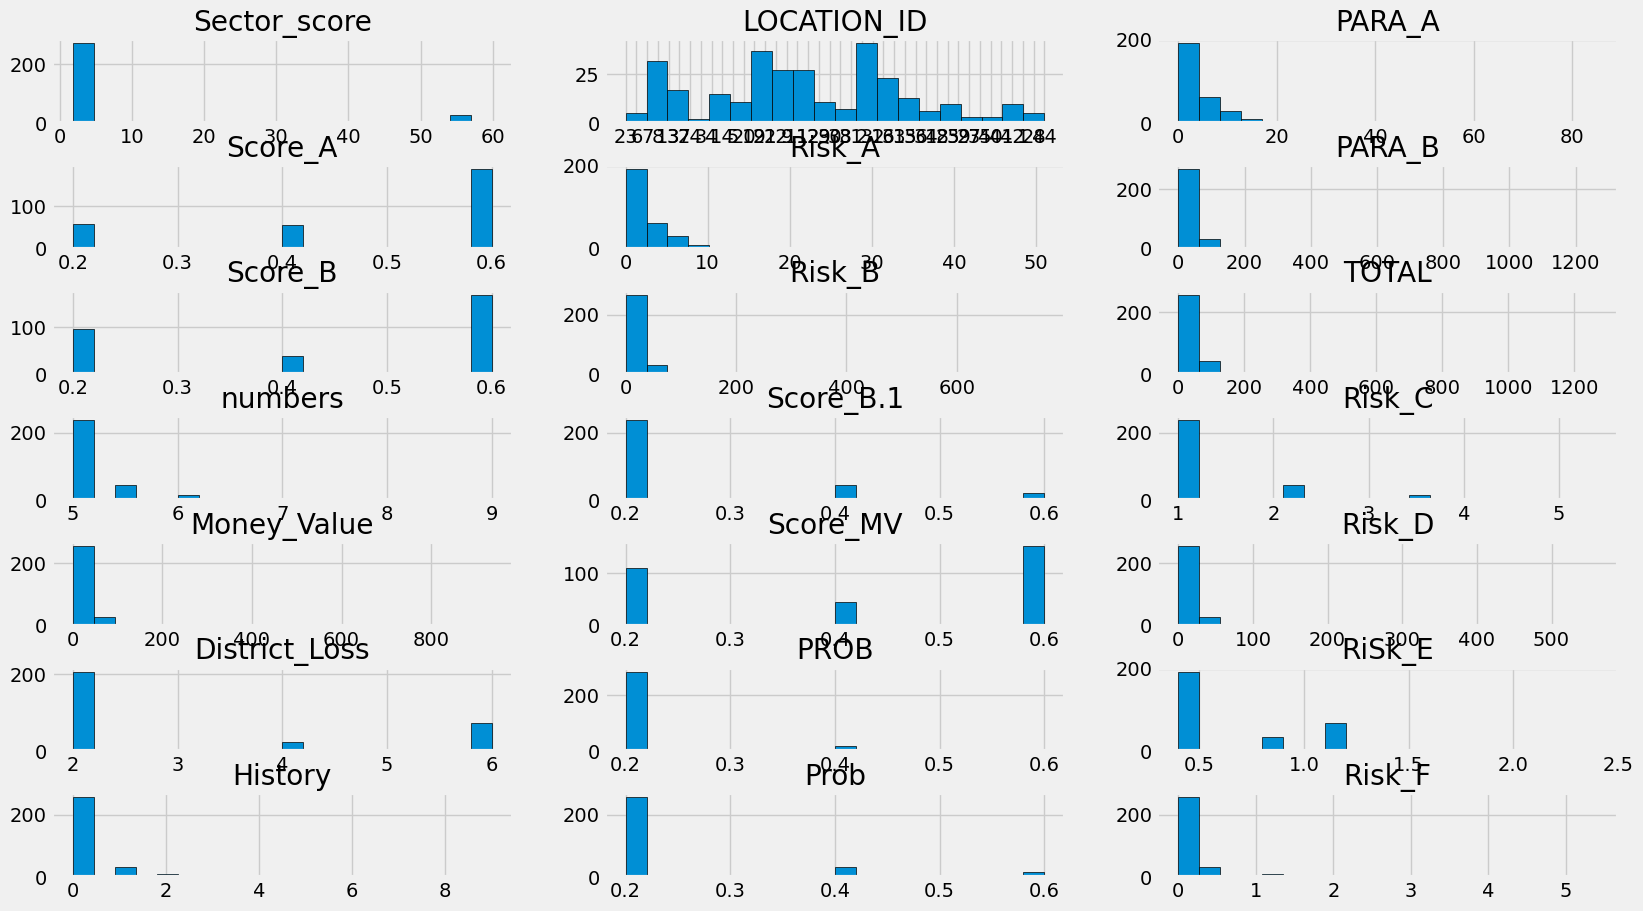

In [16]:
df1 = df[df['Risk'] == 1]
columns = df1.columns[:21]
plt.subplots(figsize=(18,15))
length = len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
 plt.subplot((length//2),3,j+1)
 plt.subplots_adjust(wspace=0.2,hspace=0.5)
 df1[i].hist(bins=20,edgecolor='black')
 plt.title(i)
plt.show()

In [17]:
y = df['Risk']
y

0      1
1      0
2      0
3      1
4      0
      ..
771    0
772    0
773    0
774    0
775    0
Name: Risk, Length: 776, dtype: int64

# Train Test Split
The train-test split procedure is used to estimate the performance of machine learning
algorithms when they are used to make predictions on data not used to train the model.
It is a fast and easy procedure to perform, the results of which allow you to compare
the performance of machine learning algorithms for your predictive modeling problem.
Although simple to use and interpret, there are times when the procedure should not be
used, such as when you have a small dataset and situations where additional
configuration is required, such as when it is used for classification and the dataset is not
balanced.


In [18]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 123)

In [19]:
X_train[X_train['LOCATION_ID'] == 'SAFIDON']

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk
367,1.99,SAFIDON,0.48,0.2,0.096,0.0,0.2,0.0,0.48,5.0,...,2,0.2,0.4,0,0.2,0.0,2.0,1.59,0.4,0.318


In [20]:
X_train


,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk
48,3.89,21,0.00,0.2,0.000,20.71,0.6,12.426,20.71,5.0,...,2,0.2,0.4,2,0.6,1.2,4.0,27.500,1.6,22.0000
540,59.85,8,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,...,2,0.2,0.4,0,0.2,0.0,2.0,1.458,0.4,0.2916
604,55.57,1,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,...,6,0.2,1.2,0,0.2,0.0,2.4,2.200,1.2,1.3200
226,2.72,8,5.61,0.6,3.366,99.33,0.6,59.598,104.94,6.5,...,2,0.2,0.4,0,0.2,0.0,4.8,113.146,0.4,22.6292
534,21.61,16,0.27,0.2,0.054,0.35,0.2,0.070,0.62,5.0,...,2,0.2,0.4,0,0.2,0.0,2.0,1.524,0.4,0.3048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,1.99,12,1.65,0.4,0.660,0.00,0.2,0.000,1.65,5.0,...,2,0.2,0.4,0,0.2,0.0,2.2,2.062,0.4,0.4124
509,21.61,9,85.00,0.6,51.000,1.06,0.4,0.424,86.06,5.0,...,6,0.2,1.2,0,0.2,0.0,3.4,53.624,1.2,32.1744
518,21.61,16,0.62,0.2,0.124,0.71,0.2,0.142,1.33,5.0,...,2,0.2,0.4,0,0.2,0.0,2.0,1.682,0.4,0.3364
382,1.99,16,1.82,0.4,0.728,0.00,0.2,0.000,1.82,5.0,...,4,0.2,0.8,0,0.2,0.0,2.8,53.606,0.8,21.4424


In [21]:
X_train['LOCATION_ID'] = X_train['LOCATION_ID'].replace('SAFIDON', 0)
X_train['LOCATION_ID'] = pd.to_numeric(X_train['LOCATION_ID'], errors='coerce').fillna(0)
X_train['LOCATION_ID']

48     21.0
540     8.0
604     1.0
226     8.0
534    16.0
       ... 
370    12.0
509     9.0
518    16.0
382    16.0
502     5.0
Name: LOCATION_ID, Length: 620, dtype: float64

In [22]:
X_train['LOCATION_ID'].dtype

dtype('float64')

In [23]:
X_train['LOCATION_ID'] = X_train['LOCATION_ID'].astype('int')


# Feature Scaling
Feature scaling is a method used to normalize the range of independent variables or
features of data. In data processing, it is also known as data normalization and is
generally performed during the data preprocessing step.


In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scaled = pd.DataFrame(sc_X.fit_transform(X_train))
X_test_scaled = pd.DataFrame(sc_X.transform(X_test))

# Applying Base Model : Logistic Regression

In [25]:
logi = LogisticRegression(random_state = 0, penalty = 'none')
logi.fit(X_train_scaled, y_train)

LogisticRegression(penalty='none', random_state=0)

# Cross Validation
Cross-validation is a technique for evaluating ML models by training several ML
models on subsets of the available input data and evaluating them on the
complementary subset of the data. Use cross-validation to detect overfitting, ie, failing 
to generalize a pattern

In [26]:
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=7)
scoring = 'accuracy'
acc_logi = cross_val_score(estimator = logi, X = X_train_scaled, y = y_train, cv = kfold,scoring=scoring)
acc_logi.mean()


0.9806451612903226

# Model Evaluation
Model evaluation aims to estimate the generalization accuracy of a model on future
(unseen/out-of-sample) data.
Methods for evaluating a model’s performance are divided into 2 categories: namely,
holdout and Cross-validation. Both methods use a test set (i.e data not seen by the model)
to evaluate model performance.


In [27]:
y_predict_logi = logi.predict(X_test_scaled)
acc= accuracy_score(y_test, y_predict_logi)
roc=roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)
results = pd.DataFrame([['Logistic Regression',acc, acc_logi.mean(),prec,rec, f1,roc]],
 columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results


,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.980769,0.980645,0.967742,0.983607,0.97561,0.981277


Result:
The accuracy of Logistic Regression is 98% 

# Applying Random Forest

In [28]:
random_forest_e = RandomForestClassifier(n_estimators = 100,criterion='entropy', random_state = 47)
random_forest_e.fit(X_train_scaled, y_train)


RandomForestClassifier(criterion='entropy', random_state=47)

# Cross Validation

In [29]:
acc_rande = cross_val_score(estimator = random_forest_e, X = X_train_scaled, y = y_train, cv = kfold, scoring=scoring)
acc_rande.mean()

0.9983870967741936

# Model evaluation

In [30]:
y_predict_r = random_forest_e.predict(X_test_scaled)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)
model_results = pd.DataFrame([['Random Forest',acc, acc_rande.mean(),prec,rec, f1,roc]],
 columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC,F1Score
0,Logistic Regression,0.980769,0.980645,0.967742,0.983607,0.97561,0.981277,NaN
1,Random Forest,1.000000,0.998387,1.000000,1.000000,NaN,1.000000,1.0


# Plotting ROC AUC Curve
AUC - ROC curve is a performance measurement for the classification problems at
various threshold settings. ROC is a probability curve and AUC represents the degree or
measure of separability. It tells how much the model is capable of distinguishing between
classes. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s


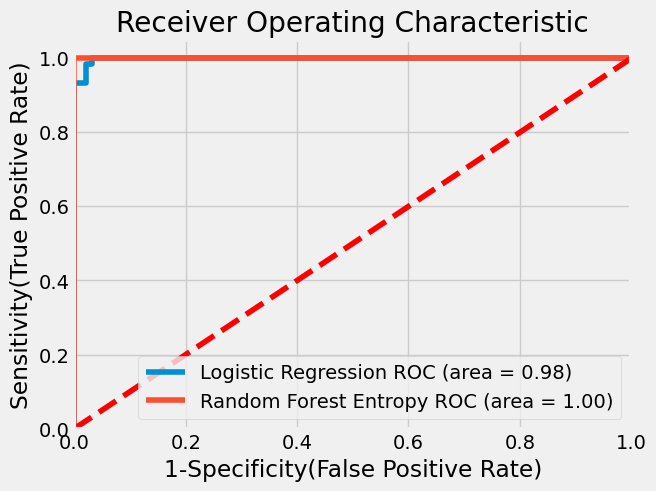

In [31]:
from sklearn import metrics
import matplotlib.pyplot as plt
plt.figure()
models = [
{
 'label': 'Logistic Regression',
 'model': LogisticRegression(random_state = 0, penalty = 'l2'),
},
 {
 'label': 'Random Forest Entropy',
 'model': RandomForestClassifier(n_estimators = 100,criterion='entropy', random_state = 47),
},

]
for m in models:
 model = m['model']
 model.fit(X_train_scaled, y_train)
 y_pred=model.predict(X_test_scaled)
 fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
 auc = metrics.roc_auc_score(y_test,model.predict(X_test_scaled))
 plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Results:

• Logistic Regression
Sensitivity=(TP/TP+FN) = (60/60+1)=0.98
Specificity=(TN/TN+FP)=(93/93+2)=0.97
1-Specificity=0.03


• Random Forest Classifier
Sensitivity=(TP/TP+FN) = (61/61+0)= 1
Specificity=(TN/TN+FP)=(95/95)=1
1-Specificity=0

# Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

Let's now define the most basic terms, which are whole numbers (not rates):

• true positives (TP): These are cases in which we predicted yes (they have the disease),and they do have the disease.

• true negatives (TN): We predicted no, and they don't have the disease.

• false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")

• false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")


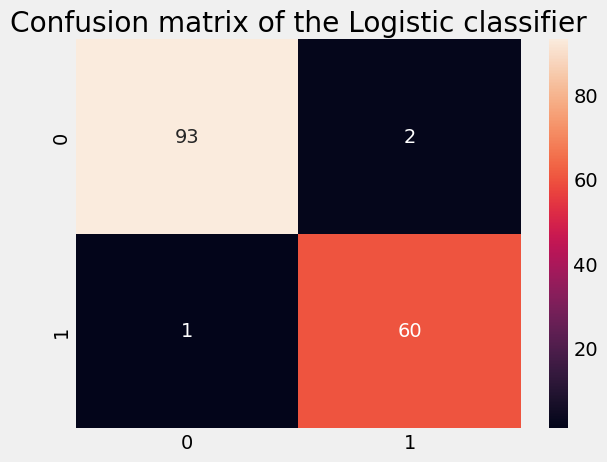

In [32]:
cm_logi = confusion_matrix(y_test, y_predict_logi)
plt.title('Confusion matrix of the Logistic classifier')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()


Result:

• There are 93 firms true negative and 60 true positive

• There is 1 false negative and 2 false positive


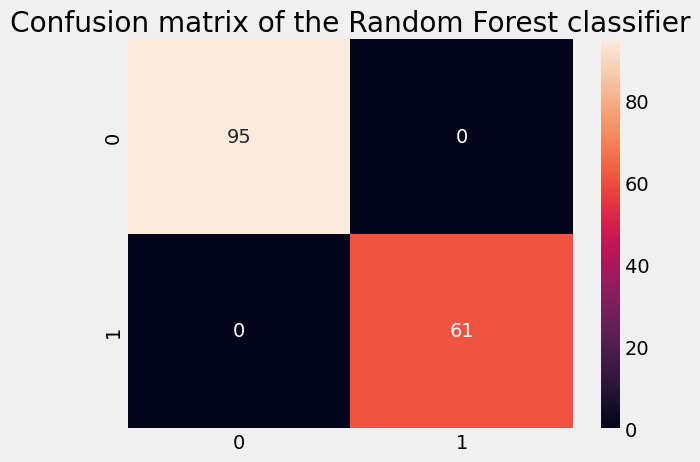

In [33]:
cm_r = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest classifier')
sns.heatmap(cm_r,annot=True,fmt="d")
plt.show()

Result:
    
• There are 95 firms true negative and 61 true positive

• There is 0 false negative and 0 false positive

# Feature Importance Plot

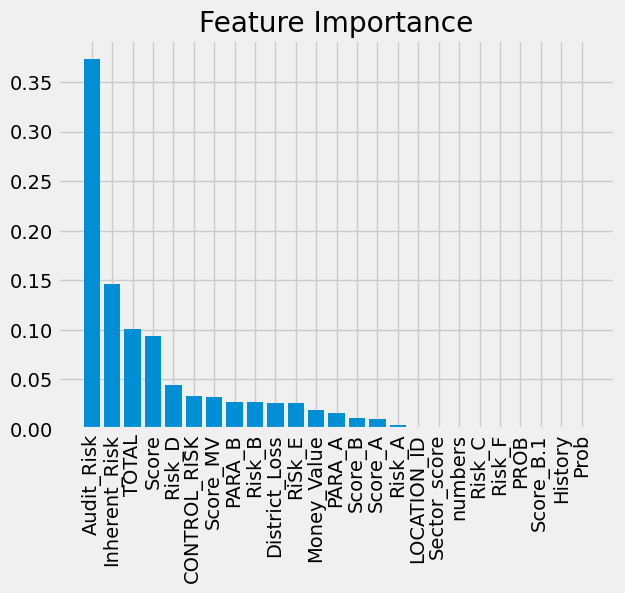

In [34]:
import numpy as np
import matplotlib.pyplot as plt

importances = random_forest_e.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()